In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats

warnings.filterwarnings("ignore")
set_matplotlib_formats('svg')
sns.set_style(style="darkgrid")

Pewnego dnia, w małym mieście o nazwie “DataVille”, mieszkańcy zauważyli, że ich miasto zaczęło doświadczać dziwnych zjawisk. Zauważyli, że niektóre obszary miasta zaczęły wykazywać niezwykłe wzorce, które nie były wcześniej widoczne. Władze miasta postanowiły zbadać te zjawiska i zebrały dane z różnych obszarów miasta.  
  
Twoim zadaniem jako naukowca ds. danych jest analiza tych danych i zrozumienie, co się dzieje. Dane są dostępne w pliku CSV o nazwie `DataVille.csv`. Każdy wiersz w pliku reprezentuje obszar w mieście, a kolumny to różne cechy tego obszaru.


# 1. Wczytaj dane z pliku `DataVille.csv` za pomocą biblioteki `pandas`. Wyświetl pierwsze 5 wierszy danych.

In [2]:
import pandas as pd

data = pd.read_csv("DataVille.csv")
data.head()

,X,Y
0,1.247373,0.282954
1,0.692072,1.584551
2,1.320563,-0.691040
3,0.671814,-0.107026
4,-0.072987,0.290337


In [3]:
data.shape

(1000, 2)

In [ ]:
#  Odpowiedz
import pandas as pd

data = pd.read_csv('DataVille.csv')
data.head()

# 2. Sprawdź, czy w danych są jakieś brakujące wartości.

In [5]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [ ]:
#  Odpowiedz
data.isnull().sum()

# 3. Przedstaw podstawowe statystyki opisowe dla każdej kolumny w danych.

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,1000.0,1.005851,2.159596,-5.923001,-0.376565,0.399975,2.106688,10.389611
Y,1000.0,0.992997,1.226771,-2.153948,-0.024364,1.015395,1.983115,3.868838


In [ ]:
#  Odpowiedz
data.describe()

# 4. Zwizualizuj rozproszenie danych.
# Ile klastrów widzisz?

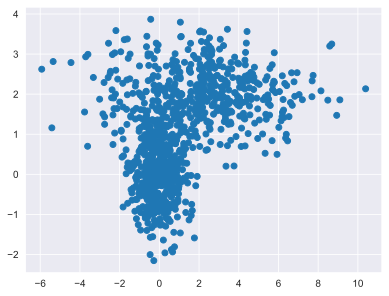

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=data["X"], y=data["Y"])
plt.show()

In [ ]:
#  Odpowiedz
plt.scatter(x=data["X"], y=data["Y"])
plt.show()

# 5. Zastosuj algorytmy grupowania `K-Means` i `GMM` do grupowania danych.  
#  Zwizualizuj wyniki.  
#  Oceń klasyfikacje.

__Note:__ Dla lepszego wyniku wizualizacji mozesz uzyc kolormapy `bwr`

In [8]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

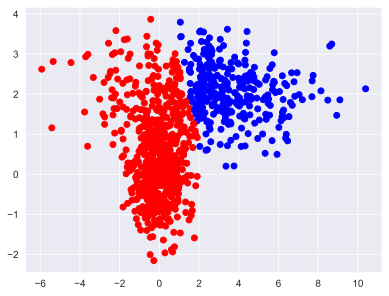

In [10]:
kmean = KMeans(n_clusters=2).fit(data)
predict = kmean.labels_
plt.scatter(x=data["X"], y=data["Y"], c=predict, cmap="bwr")
plt.show()

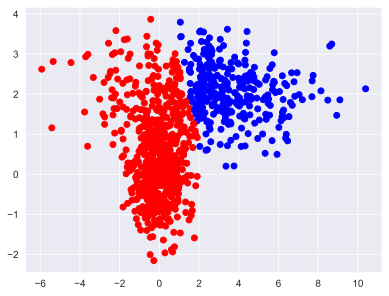

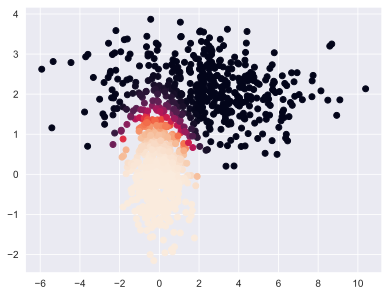

In [15]:
#  Odpowiedzi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

k=2
kmeans = KMeans(n_clusters=k).fit(data)
plt.scatter(x=data["X"], y=data["Y"], c=kmeans.labels_, cmap="bwr")
plt.show()

gmm = GaussianMixture(n_components=k).fit(data)
# plt.scatter(x=data["X"], y=data["Y"], c=gmm.predict(data))
plt.scatter(x=data["X"], y=data["Y"], c=gmm.predict_proba(data)[:, 0])
plt.show()

ValueError: 'c' argument has 2000 elements, which is inconsistent with 'x' and 'y' with size 1000.

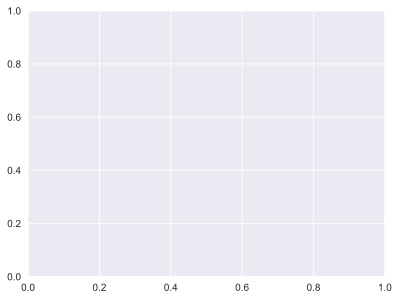

In [14]:
gmm = GaussianMixture(n_components=2).fit(data)
# gmm_predict = gmm.predict(data)
gmm_predict = gmm.predict_proba(data)
plt.scatter(x=data["X"], y=data["Y"], c=gmm_predict)
plt.show()
